In [4]:

df=open('names.csv','r').read().splitlines()


In [5]:
words = [
    str(name).strip().strip('"').strip(',').lower() 
    for name in df 
    if str(name).strip().strip('"').strip(',').isalpha()
]

In [6]:
min(len(w) for w in words)
max(len(w) for w in words)

19

In [ ]:
words

In [ ]:
for w in words[:1]:
    chs=['<s>'] + list(w) + ['<e>']
    for ch1,ch2 in zip(chs,chs[1:]): # will go till shorter only
        print(ch1,ch2)

In [ ]:
!pip install torch


In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import sys
!{sys.executable} -m pip install torch torchvision torchaudio

In [14]:
import torch

In [69]:
N=torch.zeros((27,27),dtype=torch.int32)

In [ ]:
N

In [71]:
m=set(''.join(words))
n={word for word in m if word.isalpha()}
chars=sorted(list(n))

In [72]:
stoi={s:i+1 for i,s in enumerate(chars)}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [73]:
stoi['<.>']=0

In [74]:
b={}
for w in words:
    chs=['<.>'] + list(w) + ['<.>']
    for ch1,ch2 in zip(chs,chs[1:]): # will go till shorter only
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1
      

In [ ]:
N=N+1
N

In [25]:
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

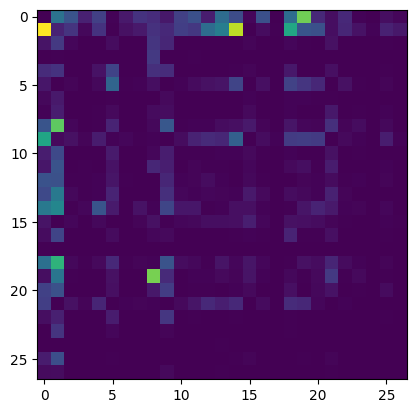

In [41]:
plt.imshow(N)

In [64]:
itos={i:s for s,i in stoi.items()}

In [65]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '<.>'}

In [244]:
p=N[0].float()
p=p/p.sum()
p

tensor([0.0005, 0.0900, 0.0612, 0.0218, 0.0456, 0.0032, 0.0168, 0.0353, 0.0304,
        0.0157, 0.0458, 0.0582, 0.0195, 0.0842, 0.0554, 0.0049, 0.0580, 0.0005,
        0.0842, 0.1867, 0.0276, 0.0093, 0.0282, 0.0031, 0.0005, 0.0092, 0.0043])

In [245]:
g=torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
p[ix]
itos[ix]

'd'

In [246]:
g=torch.Generator().manual_seed(2147483647)
p=torch.rand(3,generator=g) # this initalize a 1D tensor with 3 values from between 0 to 1
p=p/p.sum() # the final ans will be treated as weights
p


tensor([0.6064, 0.3033, 0.0903])

In [79]:
torch.multinomial(p,num_samples=20,replacement=True,generator=g)# feeding weights to  get outputs

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
g=torch.Generator().manual_seed(2147483647)
for i in range(200):
    ix=0 
    emp=''
    while True:
        p=N[ix]/N[ix].sum()
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        if ix==0:
            break
        emp=emp+ itos[ix]
    print(emp)




In [ ]:
# so here we are gtting wierd result because these character models only focus on just last words rather then the whole.
#lets uniformily distributes the probability


In [ ]:
for i in range(200):
    ix=0 
    emp=''
    while True:
        #p=N[ix]/N[ix].sum()
        p=torch.ones(27).float()/27.0
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        if ix==0:
            break
        emp=emp+ itos[ix]
    print(emp)

# off course from the output simple model was far better

In [255]:
#smart way
P=N.float()
P/=P.sum(1,keepdim=True)

#be carefulll keepdim is true to normalize the  row,else it will normalize columns




In [160]:
# the divied brodcastin rule....after aligning all formt he right from the last dims either must be equal,one should be 1 or one doesnt exist#
# s# if its not exisitnig internally 1 occurs and then same happends
#27 ,27
#27,1 ..internally straches out 1 to be equal to 27

In [ ]:
P #here the 'P' is a tensor!!

In [259]:
g=torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix=0 
    emp=''
    while True:
        p=P[ix]
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        if ix==0:
            break
        emp=emp+ itos[ix]
    print(emp)

deeba
momakuraropritahampanimjanainjakadk
ka
da
samitabhjabhr
gotashishishanau
ka
teda
ka
hakamsade


In [260]:
#lets measrue error and accuracy
log_hood=0;
n=0;
for w in ['andrejq']:
    chs=['<.>'] + list(w) + ['<.>']
    for ch1,ch2 in zip(chs,chs[1:]): # will go till shorter only
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1,ix2]
        n+=1
        log_hood+=torch.log(prob)
        print(f'{ch1} {ch2} = {prob:.4f}' )
print(log_hood/n)
print(-log_hood/n)

<.> a = 0.0900
a n = 0.1682
n d = 0.1276
d r = 0.0684
r e = 0.0598
e j = 0.0084
j q = 0.0029
q <.> = 0.1308
tensor(-3.0499)
tensor(3.0499)


In [ ]:
#so as q not comes after j anyhow,it give infintee result,,,so we have to smoothen the model input 
#in above code just do N=N+1

In [ ]:
#now we want to reduce the loss or want to take the -ve lognlikely hood about 0 and the log  hood to max 

*** now lets move to the neurel netwrok for this model ***

In [363]:
xs=[]
ys=[]
for w in words[:1]:
    chs=['<.>'] + list(w) + ['<.>']
    for ch1,ch2 in zip(chs,chs[1:]): # will go till shorter only
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)
xs

<.> a
a a
a b
b i
i d
d <.>


[0, 1, 1, 2, 9, 4]

In [364]:
xs=torch.tensor(xs,dtype=torch.int64)
ys=torch.tensor(ys)
xs


tensor([0, 1, 1, 2, 9, 4])

In [365]:
g=torch.Generator().manual_seed(2147483647)
w=torch.rand((27,27),generator=g,requires_grad=True)
w.shape

torch.Size([27, 27])

In [366]:
xs.dtype

torch.int64

In [367]:
import torch.nn.functional as f
xs=f.one_hot(xs,num_classes=27).float()
xs

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [375]:
y_prob=xs @ w
y_prob.shape

torch.Size([6, 27])

In [376]:
y_prob

tensor([[0.7081, 0.3589, 0.1054, 0.5996, 0.0904, 0.0899, 0.8822, 0.9887, 0.0080,
         0.2908, 0.7408, 0.4012, 0.8640, 0.7391, 0.3845, 0.2176, 0.7054, 0.9882,
         0.9600, 0.4388, 0.7074, 0.0554, 0.8117, 0.3059, 0.9928, 0.3419, 0.2070],
        [0.6071, 0.8600, 0.3276, 0.5998, 0.1621, 0.3729, 0.5870, 0.3176, 0.3409,
         0.9189, 0.7568, 0.6050, 0.5705, 0.7584, 0.9721, 0.5651, 0.4407, 0.6008,
         0.1163, 0.4279, 0.0574, 0.0711, 0.8033, 0.3436, 0.4670, 0.1440, 0.5037],
        [0.6071, 0.8600, 0.3276, 0.5998, 0.1621, 0.3729, 0.5870, 0.3176, 0.3409,
         0.9189, 0.7568, 0.6050, 0.5705, 0.7584, 0.9721, 0.5651, 0.4407, 0.6008,
         0.1163, 0.4279, 0.0574, 0.0711, 0.8033, 0.3436, 0.4670, 0.1440, 0.5037],
        [0.4244, 0.8139, 0.2275, 0.4577, 0.7701, 0.8770, 0.0389, 0.5286, 0.7724,
         0.6607, 0.6266, 0.4569, 0.8323, 0.9779, 0.3174, 0.4722, 0.3212, 0.6840,
         0.8664, 0.6026, 0.9374, 0.1093, 0.4679, 0.1706, 0.8736, 0.0081, 0.7697],
        [0.0170, 0.6154,

In [377]:
y_prob1=torch.exp(y_prob)
y_prob2=y_prob1/y_prob1.sum(1,keepdim=True)
y_prob2
y_prob2.dtype

torch.float32

In [378]:
loss=-y_prob[torch.arange(6),ys].log().mean()
loss.item()

0.6394746899604797

In [372]:
w.grad=None

In [373]:
loss.backward()

In [374]:
w.data += -0.01*w.grad